In [206]:
import pandas as pd
import numpy as np
import sys
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../Py_Files/")


from preprocess_data import preprocess_data # preprocess the data


# Q3
Which workclass categories are associated with the greatest likelihood of upward mobility, and how does education moderate this relationship?

We will use K-Means, DBSCAN, and apriori techniques to understand which workclass categories are linked to upward mobility

In [207]:
column_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
                'Marital-status', 'Occupation', 'Relationship', 'Race',
                'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week',
                'Native-country', 'Income']
df = pd.read_csv("../Data/adult.csv", names=column_names)
df.head()

X_transformed, feature_names = preprocess_data(df)

In [208]:
print(feature_names)

['num__Age' 'num__Education-num' 'num__Capital-gain' 'num__Capital-loss'
 'num__Hours-per-week' 'cat__Workclass_ ?' 'cat__Workclass_ Federal-gov'
 'cat__Workclass_ Local-gov' 'cat__Workclass_ Never-worked'
 'cat__Workclass_ Private' 'cat__Workclass_ Self-emp-inc'
 'cat__Workclass_ Self-emp-not-inc' 'cat__Workclass_ State-gov'
 'cat__Workclass_ Without-pay' 'cat__Education_ 10th'
 'cat__Education_ 11th' 'cat__Education_ 12th' 'cat__Education_ 1st-4th'
 'cat__Education_ 5th-6th' 'cat__Education_ 7th-8th' 'cat__Education_ 9th'
 'cat__Education_ Assoc-acdm' 'cat__Education_ Assoc-voc'
 'cat__Education_ Bachelors' 'cat__Education_ Doctorate'
 'cat__Education_ HS-grad' 'cat__Education_ Masters'
 'cat__Education_ Preschool' 'cat__Education_ Prof-school'
 'cat__Education_ Some-college' 'cat__Marital-status_ Divorced'
 'cat__Marital-status_ Married-AF-spouse'
 'cat__Marital-status_ Married-civ-spouse'
 'cat__Marital-status_ Married-spouse-absent'
 'cat__Marital-status_ Never-married' 'cat__Mari

In [209]:
from sklearn.cluster import KMeans

df_new = pd.DataFrame(X_transformed, columns=feature_names)
relevant_columns = [
    col for col in feature_names
    if col.startswith('cat__Workclass_') or
       col.startswith('cat__Education_') or
       col in ['num__Capital-gain', 'num__Capital-loss']
]

X_relevant = pd.DataFrame(X_transformed, columns=feature_names)[relevant_columns]

wcss = []  # within-cluster Sum of Squares
bcss = []  # between-cluster Sum of Squares

# total sum of squares
tss = ((df_new - df_new.mean()) ** 2).sum().sum()

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, n_init=100, max_iter=100, random_state=0)
    kmeans.fit(X_relevant)

    wcss.append(kmeans.inertia_)
    bcss.append(tss - kmeans.inertia_)

results = pd.DataFrame({
    'K': range(1, 11),
    'Within cluster sum of squares': wcss,
    'Between cluster sum of squares': bcss
})

print(results)



    K  Within cluster sum of squares  Between cluster sum of squares
0   1                  107666.616155                   201684.807371
1   2                   76083.519955                   233267.903571
2   3                   47403.310585                   261948.112941
3   4                   39262.770941                   270088.652584
4   5                   33772.939980                   275578.483546
5   6                   29776.356209                   279575.067317
6   7                   27086.540521                   282264.883005
7   8                   25254.582655                   284096.840870
8   9                   23177.598200                   286173.825326
9  10                   21696.956014                   287654.467512


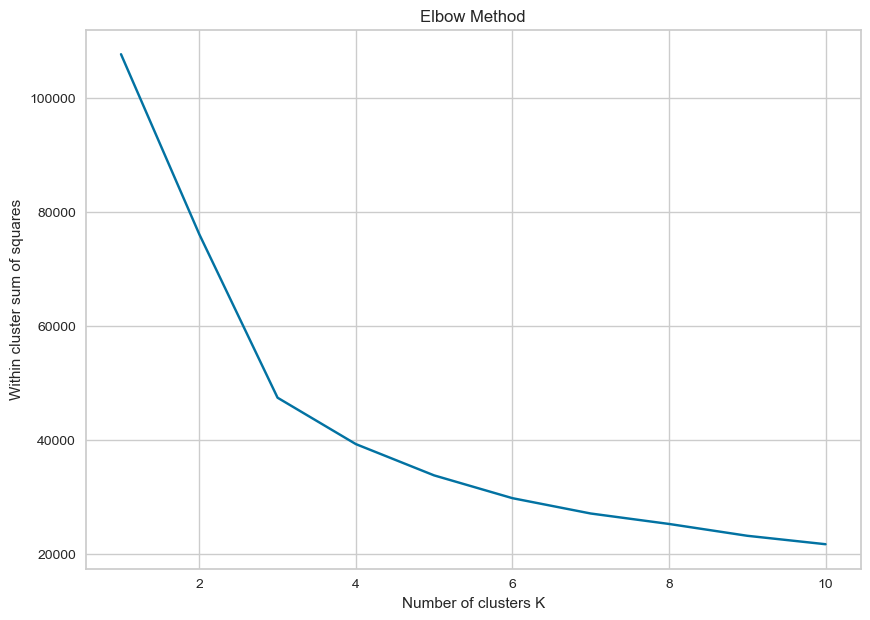

In [210]:
plt.figure(figsize=(10, 7))
plt.plot(results['K'], results['Within cluster sum of squares'])
plt.title("Elbow Method")
plt.xlabel("Number of clusters K")
plt.ylabel("Within cluster sum of squares")
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


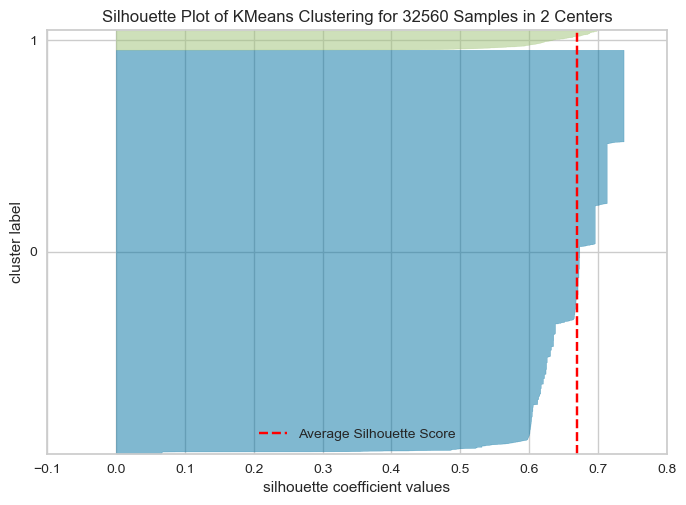

For a cluster of size 2, the overall average silhouette width is 0.7820321824387666 and the minimum per cluster average silhouette width is [0.7663227587302461]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


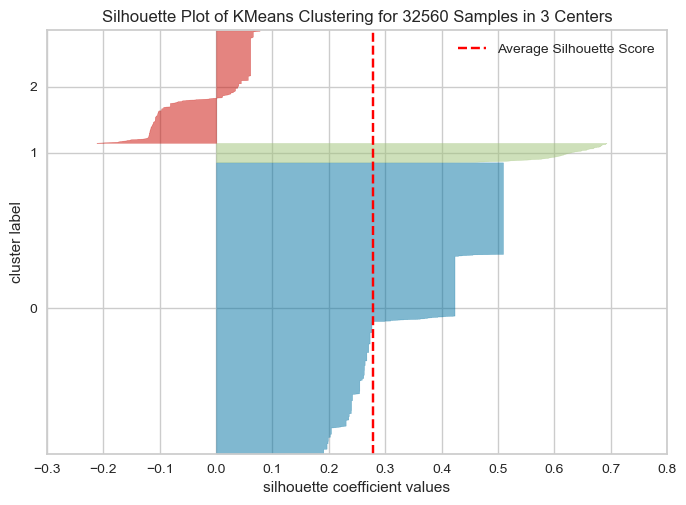

For a cluster of size 3, the overall average silhouette width is 0.3056530452552263 and the minimum per cluster average silhouette width is [0.031424492734453136]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


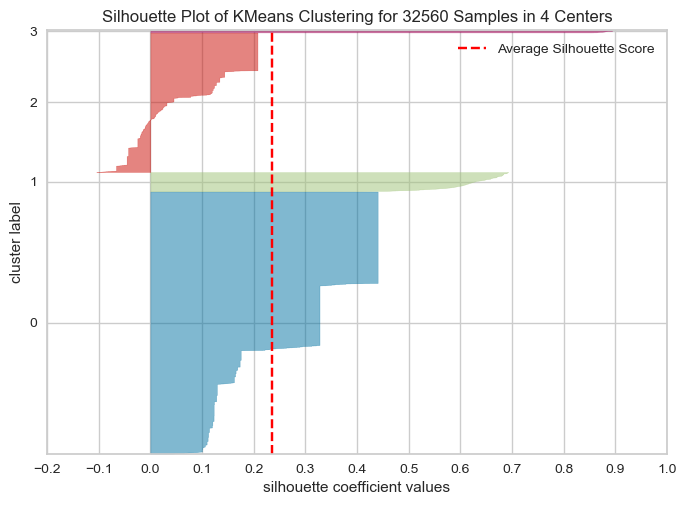

For a cluster of size 4, the overall average silhouette width is 0.22720886829627815 and the minimum per cluster average silhouette width is [0.15243076856254542]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


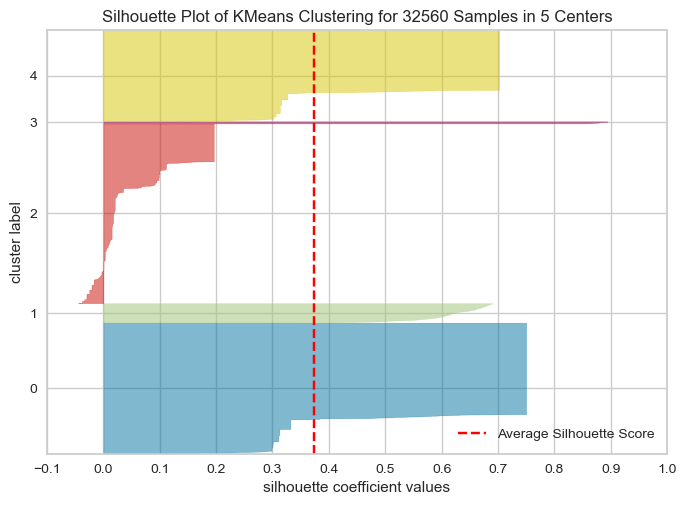

For a cluster of size 5, the overall average silhouette width is 0.41713936881657065 and the minimum per cluster average silhouette width is [0.2804677439807998]


In [211]:
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

d_matrix = distance_matrix(X_relevant, X_relevant)
# print(d_matrix)

overall_avg = []

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=100)
    labels = kmeans.fit_predict(X_relevant)

    silhouette_avg = silhouette_score(d_matrix, labels)
   
    overall_avg.append(silhouette_avg) # overall avg silhouette width

    samples = silhouette_samples(d_matrix, labels)

    min_avg = []
    for j in range(i):

        cluster_silhouette = samples[labels == j]
    
        min_avg.append(np.mean(cluster_silhouette))

    min_avg_all = []
    min_avg_all.append(min(min_avg)) # get the minimum of the average
   
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') # visualize silhouette plots
    visualizer.fit(X_relevant)
    visualizer.show()
    print(f"For a cluster of size {i}, the overall average silhouette width is {silhouette_avg} and the minimum per cluster average silhouette width is {min_avg_all}")
    


For cluster of size 2, the CH index is 3901.2260471772342
For cluster of size 3, the CH index is 3435.657349000895


/var/folders/fh/6tfzm66n17n8mm60l_qf8hzr0000gn/T/ipykernel_32245/1030307944.py:22: RuntimeWarning: invalid value encountered in log10
  overall_avg_log.append(np.log10(silhouette_avg)) # convert to log


For cluster of size 4, the CH index is 3948.5311255845377
For cluster of size 5, the CH index is 3425.723401319997


/var/folders/fh/6tfzm66n17n8mm60l_qf8hzr0000gn/T/ipykernel_32245/1030307944.py:22: RuntimeWarning: invalid value encountered in log10
  overall_avg_log.append(np.log10(silhouette_avg)) # convert to log


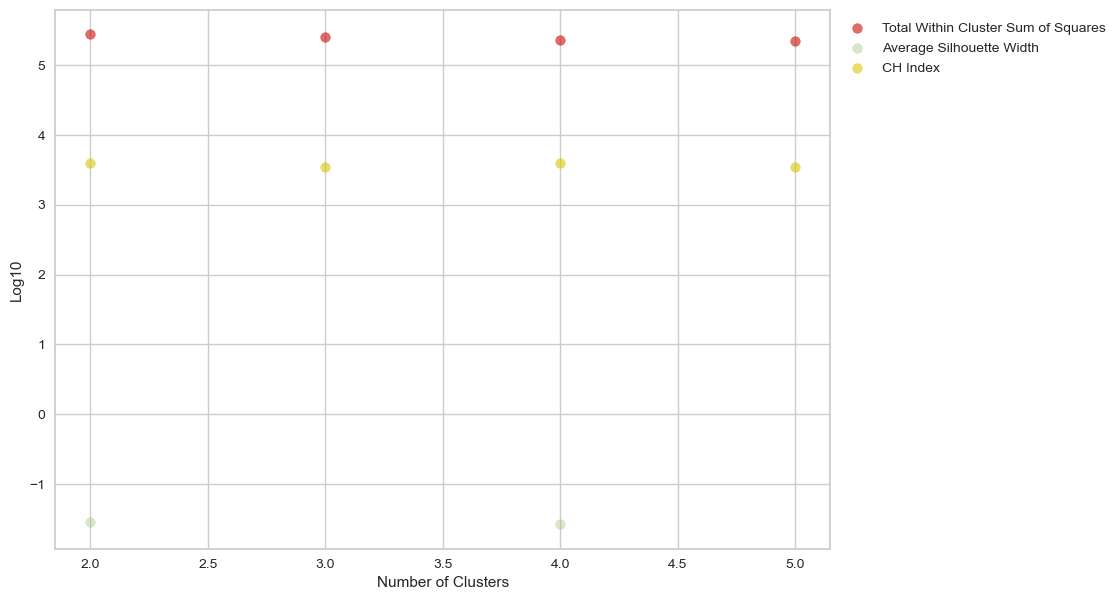

In [212]:
from sklearn.metrics import calinski_harabasz_score

ch_values = []
wcss_log = []
overall_avg_log = []
smallest_avg_log = []
ch_log = []

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=100)
    labels = kmeans.fit_predict(df_new)

    ch_index = calinski_harabasz_score(df_new, labels) # CH index
    print(f"For cluster of size {i}, the CH index is {ch_index}")
    ch_values.append(ch_index)
    ch_log.append(np.log10(ch_index))

    silhouette_avg = silhouette_score(d_matrix, labels)
    samples = silhouette_samples(d_matrix, labels)
    
    wcss_log.append(np.log10(kmeans.inertia_)) # convert to log 
    overall_avg_log.append(np.log10(silhouette_avg)) # convert to log

    min_avg = []
    for j in range(i):

        cluster_silhouette = samples[labels == j]
    
        min_avg.append(np.mean(cluster_silhouette))

    min_avg_all = []
    min_avg_all.append(min(min_avg))

    # smallest_avg_log.append(np.log10(min_avg_all))



plt.figure(figsize=(10, 7))
plt.scatter(range(2, 6), wcss_log, label='Total Within Cluster Sum of Squares', color='r', alpha=0.6)
plt.scatter(range(2, 6), overall_avg_log, label='Average Silhouette Width', color='g', alpha=0.4)
# plt.scatter(range(2, 6), smallest_avg_log, label='Smallest Per Cluster Average Silhouette Width', color='b', alpha=0.4)
plt.scatter(range(2, 6), ch_log, label='CH Index', color='y', alpha=0.6)

plt.xlabel('Number of Clusters')
plt.ylabel('Log10')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [213]:
df_cleaned = df.dropna(how="any")

categorical_cols = ["Workclass", "Education", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Native-country", "Income"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip())

for col in categorical_cols:
    df_cleaned = df_cleaned[~df_cleaned[col].isin(['?'])]

X_relevant_cleaned = pd.DataFrame(X_transformed, columns=feature_names).iloc[df_cleaned.index]

optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, n_init=100, max_iter=300, random_state=0) # do k-means with the optimal number of clusters
kmeans_labels = kmeans_final.fit_predict(X_relevant_cleaned)

df_cleaned['KMeans_Cluster'] = kmeans_labels

# analyze the components of the k-means clusters
kmeans_cluster_analysis = df_cleaned.groupby('KMeans_Cluster').agg({
    'Income': lambda x: x.value_counts(normalize=True) if x.nunique() > 1 else 'N/A',
    'Workclass': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Education': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Age': 'mean',
    'Capital-gain': 'mean',
    'Capital-loss': 'mean',
    'Hours-per-week': 'mean'
})
print("K-Means Cluster Analysis:")
display(kmeans_cluster_analysis)

# find proportion of individuals earning >50K and <=50K
income_distribution = df_cleaned.groupby(['KMeans_Cluster', 'Income']).size().unstack(fill_value=0)
income_distribution['Proportion_>50K'] = income_distribution['>50K'] / income_distribution.sum(axis=1)
income_distribution['Proportion_<=50K'] = income_distribution['<=50K'] / income_distribution.sum(axis=1)

print("Income Distribution by Cluster:")
display(income_distribution)


df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

# group the items in the cluster by workclass and income
workclass_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass'])['Income_Binary'].mean().reset_index()
workclass_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True) # rename column

# group items in cluster by proportion of individuals making greater than 50K
highest_mobility_kmeans = workclass_mobility_kmeans.loc[
    workclass_mobility_kmeans.groupby('KMeans_Cluster')['Proportion_Above_50K'].idxmax()
]
print("Workclass categories with highest upward mobility by K-Means cluster:")
display(highest_mobility_kmeans)

# group by education and workclass and income
education_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass', 'Education'])['Income_Binary'].mean().reset_index()
education_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

print("Education and Workclass Mobility Analysis:")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  

# sort by cluster group and proportion above 50K
education_mobility_kmeans_sorted = education_mobility_kmeans.sort_values(
    by=['KMeans_Cluster', 'Proportion_Above_50K'], 
    ascending=[True, False]
)

display(education_mobility_kmeans_sorted)


K-Means Cluster Analysis:


Income Workclass Education  \
KMeans_Cluster                                                                  
0                [0.5524714568947836, 0.4475285431052164]   Private   HS-grad   
1               [0.9380713274108408, 0.06192867258915926]   Private   HS-grad   

                      Age  Capital-gain  Capital-loss  Hours-per-week  
KMeans_Cluster                                                         
0               44.297464   1992.932043    152.838996       45.499351  
1               32.920883    243.757178     27.675744       36.629909

Income Distribution by Cluster:


Income          <=50K  >50K  Proportion_>50K  Proportion_<=50K
KMeans_Cluster                                                
0                8081  6546         0.447529          0.552455
1               14572   962         0.061929          0.938068

Workclass categories with highest upward mobility by K-Means cluster:


KMeans_Cluster         Workclass  Proportion_Above_50K
3                0      Self-emp-inc              0.637950
11               1  Self-emp-not-inc              0.110224

Education and Workclass Mobility Analysis:


KMeans_Cluster         Workclass     Education  Proportion_Above_50K
56                0      Self-emp-inc   Prof-school              0.962025
6                 0       Federal-gov     Doctorate              0.916667
53                0      Self-emp-inc     Doctorate              0.875000
9                 0       Federal-gov   Prof-school              0.863636
71                0  Self-emp-not-inc   Prof-school              0.836066
82                0         State-gov     Doctorate              0.826667
8                 0       Federal-gov       Masters              0.811321
37                0           Private     Doctorate              0.801370
41                0           Private   Prof-school              0.766839
39                0           Private       Masters              0.752039
85                0         State-gov   Prof-school              0.750000
55                0      Self-emp-inc       Masters              0.746479
25                0         Local-gov   Prof-school              0.720000
52                0      Self-emp-inc     Bachelors              0.700893
68                0  Self-emp-not-inc     Doctorate              0.692308
21                0         Local-gov     Doctorate              0.681818
36                0           Private     Bachelors              0.670811
23                0         Local-gov       Masters              0.652361
5                 0       Federal-gov     Bachelors              0.629630
84                0         State-gov       Masters              0.623762
50                0      Self-emp-inc    Assoc-acdm              0.620690
4                 0       Federal-gov     Assoc-voc              0.600000
57                0      Self-emp-inc  Some-college              0.586387
51                0      Self-emp-inc     Assoc-voc              0.586207
44                0      Self-emp-inc          11th              0.571429
48                0      Self-emp-inc       7th-8th              0.571429
70                0  Self-emp-not-inc       Masters              0.566667
81                0         State-gov     Bachelors              0.566176
10                0       Federal-gov  Some-college              0.560000
20                0         Local-gov     Bachelors              0.544402
7                 0       Federal-gov       HS-grad              0.528455
19                0         Local-gov     Assoc-voc              0.512195
54                0      Self-emp-inc       HS-grad              0.502262
67                0  Self-emp-not-inc     Bachelors              0.477564
34                0           Private    Assoc-acdm              0.475177
18                0         Local-gov    Assoc-acdm              0.468085
3                 0       Federal-gov    Assoc-acdm              0.451613
26                0         Local-gov  Some-college              0.448649
35                0           Private     Assoc-voc              0.445396
42                0           Private  Some-college              0.429369
80                0         State-gov     Assoc-voc              0.379310
2                 0       Federal-gov           9th              0.333333
47                0      Self-emp-inc       5th-6th              0.333333
65                0  Self-emp-not-inc    Assoc-acdm              0.309524
83                0         State-gov       HS-grad              0.304688
22                0         Local-gov       HS-grad              0.303150
38                0           Private       HS-grad              0.300221
79                0         State-gov    Assoc-acdm              0.294118
62                0  Self-emp-not-inc       5th-6th              0.285714
72                0  Self-emp-not-inc  Some-college              0.281734
86                0         State-gov  Some-college              0.275000
60                0  Self-emp-not-inc          12th              0.272727
29                0           Private          12th              0.250000
45       

In [214]:

cluster_counts = df_cleaned['KMeans_Cluster'].value_counts()

# display the cluster counts
print("number of items in each K-Means cluster:")
print(cluster_counts)

number of items in each K-Means cluster:
KMeans_Cluster
1    15534
0    14627
Name: count, dtype: int64


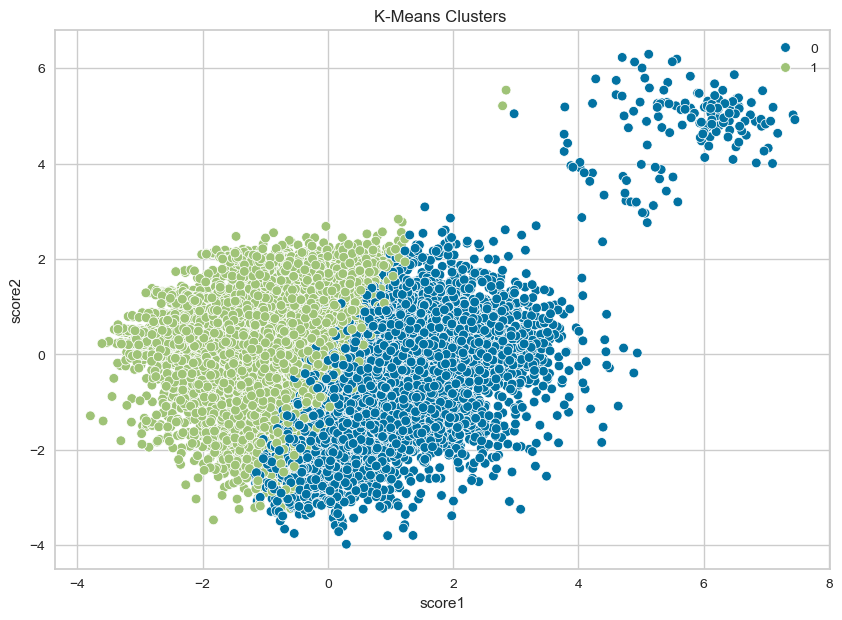

In [215]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_relevant_cleaned) # do pca to plot 

df_pca = pd.DataFrame(data=pca_transformed, columns=['score1', 'score2'])


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='score1', y='score2', hue=kmeans_labels)
plt.title("K-Means Clusters ")

plt.xlabel('score1')
plt.ylabel('score2')
plt.show()


In [216]:
silhouette_avg = silhouette_score(X_relevant_cleaned, kmeans_labels)
print(f"Average Silhouette Score for K-Means: {silhouette_avg}")

Average Silhouette Score for K-Means: 0.12190468924539051


In [217]:

dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_relevant_cleaned)
df_cleaned['DBSCAN_Cluster'] = dbscan_labels

# analyze the dbscan clusters by the averages
cluster_analysis = df_cleaned.groupby('DBSCAN_Cluster').agg({
    'Income': lambda x: x.value_counts(normalize=True) if x.nunique() > 1 else 'N/A',
    'Workclass': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Education': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Age': 'mean',
    'Capital-gain': 'mean',
    'Capital-loss': 'mean',
    'Hours-per-week': 'mean'
})
display(cluster_analysis)

# find proportion of individuals earning >50K and <=50K
income_distribution = df_cleaned.groupby(['DBSCAN_Cluster', 'Income']).size().unstack(fill_value=0)
income_distribution['Proportion_>50K'] = income_distribution['>50K'] / income_distribution.sum(axis=1)
income_distribution['Proportion_<=50K'] = income_distribution['<=50K'] / income_distribution.sum(axis=1)

print("Income Distribution by Cluster:")
display(income_distribution)

df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

# group the items in the cluster by workclass and income
workclass_mobility = df_cleaned.groupby(['DBSCAN_Cluster', 'Workclass'])['Income_Binary'].mean().reset_index()
workclass_mobility.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

# group items in cluster by proportion of individuals making greater than 50K
highest_mobility = workclass_mobility.loc[
    workclass_mobility.groupby('DBSCAN_Cluster')['Proportion_Above_50K'].idxmax()
]
print("Workclass categories with highest upward mobility by cluster:")
display(highest_mobility)

# group by education and workclass and income
education_mobility = df_cleaned.groupby(['DBSCAN_Cluster', 'Workclass', 'Education'])['Income_Binary'].mean().reset_index()
education_mobility.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

# sort by cluster group and proportion above 50K
education_mobility_sorted = education_mobility.sort_values(
    by=['DBSCAN_Cluster', 'Proportion_Above_50K'], 
    ascending=[True, False]
)
display(education_mobility_sorted)




Income Workclass  \
DBSCAN_Cluster                                                        
-1              [0.7666666666666667, 0.23333333333333334]   Private   
 0              [0.7547106886776722, 0.24528931132232784]   Private   
 1                                                    N/A   Private   

                  Education        Age  Capital-gain  Capital-loss  \
DBSCAN_Cluster                                                       
-1                  HS-grad  54.933333  12837.333333    1613.30000   
 0                  HS-grad  38.384726    598.704919      87.28004   
 1              Prof-school  46.013699  99999.000000       0.00000   

                Hours-per-week  
DBSCAN_Cluster                  
-1                   37.466667  
 0                   40.888544  
 1                   50.417808

Income Distribution by Cluster:


Income          <=50K  >50K  Proportion_>50K  Proportion_<=50K
DBSCAN_Cluster                                                
-1                 23     7         0.233333          0.760750
 0              22630  7355         0.245289          0.754705
 1                  0   146         1.000000          0.000000

Workclass categories with highest upward mobility by cluster:


DBSCAN_Cluster     Workclass  Proportion_Above_50K
5               -1     State-gov              1.000000
9                0  Self-emp-inc              0.544316
13               1     Local-gov              1.000000

DBSCAN_Cluster         Workclass     Education  Proportion_Above_50K
1                -1       Federal-gov   Prof-school              1.000000
9                -1      Self-emp-inc          10th              1.000000
14               -1  Self-emp-not-inc       HS-grad              1.000000
17               -1         State-gov     Doctorate              1.000000
13               -1  Self-emp-not-inc     Bachelors              0.666667
15               -1  Self-emp-not-inc       Masters              0.500000
0                -1       Federal-gov       HS-grad              0.000000
2                -1         Local-gov          10th              0.000000
3                -1           Private          10th              0.000000
4                -1           Private       1st-4th              0.000000
5                -1           Private       7th-8th              0.000000
6                -1           Private       HS-grad              0.000000
7                -1           Private     Preschool              0.000000
8                -1           Private  Some-college              0.000000
10               -1      Self-emp-inc     Assoc-voc              0.000000
11               -1  Self-emp-not-inc       1st-4th              0.000000
12               -1  Self-emp-not-inc       7th-8th              0.000000
16               -1  Self-emp-not-inc  Some-college              0.000000
77                0      Self-emp-inc   Prof-school              0.953125
27                0       Federal-gov     Doctorate              0.933333
74                0      Self-emp-inc     Doctorate              0.827586
30                0       Federal-gov   Prof-school              0.800000
104               0         State-gov     Doctorate              0.792683
92                0  Self-emp-not-inc   Prof-school              0.789916
58                0           Private     Doctorate              0.727273
76                0      Self-emp-inc       Masters              0.702703
29                0       Federal-gov       Masters              0.692308
46                0         Local-gov   Prof-school              0.655172
62                0           Private   Prof-school              0.650655
89                0  Self-emp-not-inc     Doctorate              0.622222
42                0         Local-gov     Doctorate              0.615385
73                0      Self-emp-inc     Bachelors              0.613546
60                0           Private       Masters              0.599062
108               0         State-gov   Prof-school              0.580645
71                0      Self-emp-inc    Assoc-acdm              0.514286
78                0      Self-emp-inc  Some-college              0.509009
44                0         Local-gov       Masters              0.508929
72                0      Self-emp-inc     Assoc-voc              0.500000
26                0       Federal-gov     Bachelors              0.454106
91                0  Self-emp-not-inc       Masters              0.452174
75                0      Self-emp-inc       HS-grad              0.423221
57                0           Private     Bachelors              0.418876
106               0         State-gov       Masters              0.418182
88                0  Self-emp-not-inc     Bachelors              0.412073
69                0      Self-emp-inc       7th-8th              0.400000
25                0       Federal-gov     Assoc-voc              0.394737
24                0       Federal-gov    Assoc-acdm              0.345455
41                0         Local-gov     Bachelors              0.338330
23                0       Federal-gov           9th              0.333333
68                0      Self-emp-inc       5th-6th              0.333333
103               0         State-gov     Bachelors              0.327068
31                0       Federal-gov  Some-college              0.326693
39                0         Local-gov    Assoc-acdm              0.313953
65       

In [218]:

cluster_counts = df_cleaned['DBSCAN_Cluster'].value_counts()

# display the cluster counts
print("number of items in each DBSCAN cluster:")
print(cluster_counts)

number of items in each DBSCAN cluster:
DBSCAN_Cluster
 0    29985
 1      146
-1       30
Name: count, dtype: int64


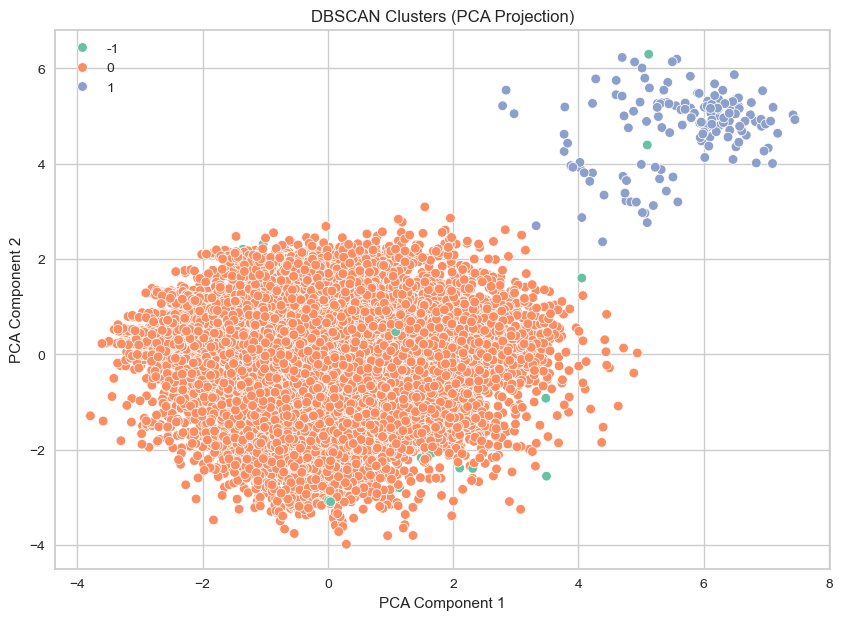

In [219]:
# visualize dbscan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_relevant_cleaned)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="Set2")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [220]:
if len(set(dbscan_labels) - {-1}) > 1:  # exclude -1 (noise)
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = X_relevant_cleaned[dbscan_labels != -1]
    silhouette_avg = silhouette_score(valid_data, valid_labels)
    print(f"Average silhouette score for DBSCAN: {silhouette_avg}")
else:
    print("There are less than 2 clusters.")

Average silhouette score for DBSCAN: 0.7206605676661473


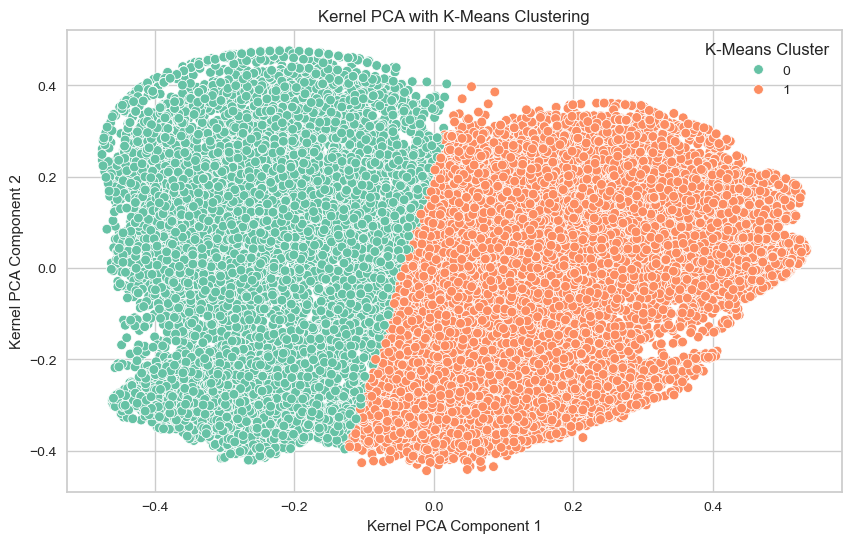

In [221]:
from sklearn.decomposition import KernelPCA

# apply kernel pca
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, random_state=42)
X_kpca = kernel_pca.fit_transform(X_relevant_cleaned)

# do k-means on the kernel pca transformed data
optimal_k = 2
kmeans_kpca = KMeans(n_clusters=optimal_k, random_state=42, n_init=100, max_iter=300)
kmeans_labels_kpca = kmeans_kpca.fit_predict(X_kpca)

# add to data frame
X_kpca_df = pd.DataFrame(X_kpca, columns=['Kernel_PCA_1', 'Kernel_PCA_2'])
X_kpca_df['KMeans_Cluster'] = kmeans_labels_kpca

# plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Kernel_PCA_1', 
    y='Kernel_PCA_2', 
    hue='KMeans_Cluster', 
    data=X_kpca_df, 
    palette='Set2', 
    legend='full'
)
plt.title("Kernel PCA with K-Means Clustering")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.legend(title="K-Means Cluster")
plt.show()


In [222]:
silhouette_avg_kpca = silhouette_score(X_kpca, kmeans_labels_kpca)
print(f"Average Silhouette Score for K-Means: {silhouette_avg}")

Average Silhouette Score for K-Means: 0.7206605676661473


In [223]:
df_cleaned['KMeans_Cluster'] = kmeans_labels_kpca

# analyze the components of the k-means clusters
kmeans_cluster_analysis = df_cleaned.groupby('KMeans_Cluster').agg({
    'Income': lambda x: x.value_counts(normalize=True) if x.nunique() > 1 else 'N/A',
    'Workclass': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Education': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Age': 'mean',
    'Capital-gain': 'mean',
    'Capital-loss': 'mean',
    'Hours-per-week': 'mean'
})
print("K-Means Cluster Analysis:")
display(kmeans_cluster_analysis)

# find proportion of individuals earning >50K and <=50K
income_distribution = df_cleaned.groupby(['KMeans_Cluster', 'Income']).size().unstack(fill_value=0)
income_distribution['Proportion_>50K'] = income_distribution['>50K'] / income_distribution.sum(axis=1)
income_distribution['Proportion_<=50K'] = income_distribution['<=50K'] / income_distribution.sum(axis=1)

print("Income Distribution by Cluster:")
display(income_distribution)


df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

# group the items in the cluster by workclass and income
workclass_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass'])['Income_Binary'].mean().reset_index()
workclass_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True) # rename column

# group items in cluster by proportion of individuals making greater than 50K
highest_mobility_kmeans = workclass_mobility_kmeans.loc[
    workclass_mobility_kmeans.groupby('KMeans_Cluster')['Proportion_Above_50K'].idxmax()
]
print("Workclass categories with highest upward mobility by K-Means cluster:")
display(highest_mobility_kmeans)

# group by education and workclass and income
education_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass', 'Education'])['Income_Binary'].mean().reset_index()
education_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

print("Education and Workclass Mobility Analysis:")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  

# sort by cluster group and proportion above 50K
education_mobility_kmeans_sorted = education_mobility_kmeans.sort_values(
    by=['KMeans_Cluster', 'Proportion_Above_50K'], 
    ascending=[True, False]
)

display(education_mobility_kmeans_sorted)

K-Means Cluster Analysis:


Income Workclass Education  \
KMeans_Cluster                                                                 
0               [0.5771095226357735, 0.4228904773642264]   Private   HS-grad   
1               [0.8687604224569205, 0.1312395775430795]   Private   HS-grad   

                      Age  Capital-gain  Capital-loss  Hours-per-week  
KMeans_Cluster                                                         
0               43.731575    900.582943      0.139430       44.635938  
1               34.856865   1221.575653    148.070817       38.424903

Income Distribution by Cluster:


Income          <=50K  >50K  Proportion_>50K  Proportion_<=50K
KMeans_Cluster                                                
0                7024  5147          0.42289          0.577089
1               15629  2361          0.13124          0.868754

Workclass categories with highest upward mobility by K-Means cluster:


KMeans_Cluster     Workclass  Proportion_Above_50K
0                0   Federal-gov              0.627685
10               1  Self-emp-inc              0.438320

Education and Workclass Mobility Analysis:


KMeans_Cluster         Workclass     Education  Proportion_Above_50K
6                 0       Federal-gov     Doctorate              1.000000
53                0      Self-emp-inc   Prof-school              0.931818
50                0      Self-emp-inc     Doctorate              0.882353
8                 0       Federal-gov       Masters              0.878788
78                0         State-gov     Doctorate              0.868421
23                0         Local-gov   Prof-school              0.866667
35                0           Private     Doctorate              0.847059
9                 0       Federal-gov   Prof-school              0.846154
20                0         Local-gov     Doctorate              0.833333
39                0           Private   Prof-school              0.793814
67                0  Self-emp-not-inc   Prof-school              0.791667
37                0           Private       Masters              0.789216
52                0      Self-emp-inc       Masters              0.765957
80                0         State-gov       Masters              0.754098
81                0         State-gov   Prof-school              0.750000
22                0         Local-gov       Masters              0.743590
5                 0       Federal-gov     Bachelors              0.740000
49                0      Self-emp-inc     Bachelors              0.736842
47                0      Self-emp-inc    Assoc-acdm              0.722222
34                0           Private     Bachelors              0.678647
4                 0       Federal-gov     Assoc-voc              0.666667
77                0         State-gov     Bachelors              0.650485
54                0      Self-emp-inc  Some-college              0.613924
42                0      Self-emp-inc          11th              0.600000
48                0      Self-emp-inc     Assoc-voc              0.600000
66                0  Self-emp-not-inc       Masters              0.590164
19                0         Local-gov     Bachelors              0.590062
10                0       Federal-gov  Some-college              0.580952
18                0         Local-gov     Assoc-voc              0.571429
45                0      Self-emp-inc       7th-8th              0.571429
64                0  Self-emp-not-inc     Doctorate              0.571429
7                 0       Federal-gov       HS-grad              0.535088
17                0         Local-gov    Assoc-acdm              0.529412
63                0  Self-emp-not-inc     Bachelors              0.480952
32                0           Private    Assoc-acdm              0.473913
3                 0       Federal-gov    Assoc-acdm              0.461538
24                0         Local-gov  Some-college              0.450000
51                0      Self-emp-inc       HS-grad              0.438503
33                0           Private     Assoc-voc              0.433014
40                0           Private  Some-college              0.423407
58                0  Self-emp-not-inc       5th-6th              0.375000
75                0         State-gov    Assoc-acdm              0.363636
76                0         State-gov     Assoc-voc              0.347826
2                 0       Federal-gov           9th              0.333333
44                0      Self-emp-inc       5th-6th              0.333333
57                0  Self-emp-not-inc          12th              0.333333
61                0  Self-emp-not-inc    Assoc-acdm              0.322581
82                0         State-gov  Some-college              0.312500
21                0         Local-gov       HS-grad              0.305677
79                0         State-gov       HS-grad              0.296610
36                0           Private       HS-grad              0.280449
68                0  Self-emp-not-inc  Some-college              0.258555
62                0  Self-emp-not-inc     Assoc-voc              0.250000
69       

In [224]:
from mlxtend.frequent_patterns import apriori, association_rules

onehot_df = pd.get_dummies(df_cleaned[['Workclass', 'Education', 'Income']])


frequent_itemsets = apriori(onehot_df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules_income = rules[rules['consequents'].apply(lambda x: 'Income_>50K' in x)]
rules_lower_income = rules[rules['consequents'].apply(lambda x: 'Income_<=50K' in x)]

rules_income['Proportion_Above_50K'] = rules_income['confidence']

rules = rules.sort_values('lift', ascending=False).head(75)
display(rules)

rules_income = rules_income.sort_values('lift', ascending=False).head(75)
display(rules_income)

rules_lower_income = rules_lower_income.sort_values('lift', ascending=False).head(75)
display(rules_lower_income)




antecedents  \
12            (Income_<=50K, Workclass_Private)   
13                          (Education_HS-grad)   
14                               (Income_<=50K)   
11       (Workclass_Private, Education_HS-grad)   
6                                (Income_<=50K)   
7                           (Education_HS-grad)   
20                               (Income_<=50K)   
17  (Workclass_Private, Education_Some-college)   
15                          (Workclass_Private)   
10            (Income_<=50K, Education_HS-grad)   
8                                (Income_<=50K)   
9                      (Education_Some-college)   
19                     (Education_Some-college)   
18            (Income_<=50K, Workclass_Private)   
0                           (Education_HS-grad)   
1                           (Workclass_Private)   
5                           (Workclass_Private)   
4                                (Income_<=50K)   
16       (Income_<=50K, Education_Some-college)   
21                          (Workclass_Private)   
3                           (Workclass_Private)   
2                      (Education_Some-college)   

                                    consequents  antecedent support  \
12                          (Education_HS-grad)            0.577202   
13            (Income_<=50K, Workclass_Private)            0.326216   
14       (Workclass_Private, Education_HS-grad)            0.751069   
11                               (Income_<=50K)            0.254534   
6                           (Education_HS-grad)            0.751069   
7                                (Income_<=50K)            0.326216   
20  (Workclass_Private, Education_Some-college)            0.751069   
17                               (Income_<=50K)            0.166307   
15            (Income_<=50K, Education_HS-grad)            0.738868   
10                          (Workclass_Private)            0.272604   
8                      (Education_Some-college)            0.751069   
9                                (Income_<=50K)            0.221412   
19            (Income_<=50K, Workclass_Private)            0.221412   
18                     (Education_Some-college)            0.577202   
0                           (Workclass_Private)            0.326216   
1                           (Education_HS-grad)            0.738868   
5                                (Income_<=50K)            0.738868   
4                           (Workclass_Private)            0.751069   
16                          (Workclass_Private)            0.177116   
21       (Income_<=50K, Education_Some-college)            0.738868   
3                      (Education_Some-college)            0.738868   
2                           (Workclass_Private)            0.221412   

    consequent support   support  confidence      lift  leverage  conviction  \
12            0.326216  0.217698    0.377161  1.156170  0.029406    1.081795   
13            0.577202  0.217698    0.667344  1.156170  0.029406    1.270977   
14            0.254534  0.217698    0.289851  1.138753  0.026526    1.049732   
11            0.751069  0.217698    0.855282  1.138753  0.026526    1.720109   
6             0.326216  0.272604    0.362954  1.112619  0.027593    1.057670   
7             0.751069  0.272604    0.835654  1.112619  0.027593    1.514675   
20            0.166307  0.136103    0.181212  1.089621  0.011194    1.018203   
17            0.751069  0.136103    0.818381  1.089621  0.011194    1.370622   
15            0.272604  0.217698    0.294638  1.080828  0.016280    1.031238   
10            0.738868  0.217698    0.798589  1.080828  0.016280    1.296514   
8             0.221412  0.177116    0.235819  1.065068  0.010821    1.018853   
9             0.751069  0.177116    0.799940  1.065068  0.010821    1.244281   
19            0.577202  0.136103    0.614705  1.064973  0.008304    1.097335   
18            0.221412  0.136103    0.235798  1.064973  0.008304    1.018825   
0             0.738868  0.25

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, Proportion_Above_50K]
Index: []

antecedents  \
13                          (Education_HS-grad)   
11       (Workclass_Private, Education_HS-grad)   
7                           (Education_HS-grad)   
17  (Workclass_Private, Education_Some-college)   
15                          (Workclass_Private)   
9                      (Education_Some-college)   
19                     (Education_Some-college)   
5                           (Workclass_Private)   
21                          (Workclass_Private)   

                               consequents  antecedent support  \
13       (Income_<=50K, Workclass_Private)            0.326216   
11                          (Income_<=50K)            0.254534   
7                           (Income_<=50K)            0.326216   
17                          (Income_<=50K)            0.166307   
15       (Income_<=50K, Education_HS-grad)            0.738868   
9                           (Income_<=50K)            0.221412   
19       (Income_<=50K, Workclass_Private)            0.221412   
5                           (Income_<=50K)            0.738868   
21  (Income_<=50K, Education_Some-college)            0.738868   

    consequent support   support  confidence      lift  leverage  conviction  \
13            0.577202  0.217698    0.667344  1.156170  0.029406    1.270977   
11            0.751069  0.217698    0.855282  1.138753  0.026526    1.720109   
7             0.751069  0.272604    0.835654  1.112619  0.027593    1.514675   
17            0.751069  0.136103    0.818381  1.089621  0.011194    1.370622   
15            0.272604  0.217698    0.294638  1.080828  0.016280    1.031238   
9             0.751069  0.177116    0.799940  1.065068  0.010821    1.244281   
19            0.577202  0.136103    0.614705  1.064973  0.008304    1.097335   
5             0.751069  0.577202    0.781198  1.040115  0.022261    1.137699   
21            0.177116  0.136103    0.184205  1.040022  0.005237    1.008689   

    zhangs_metric  
13       0.200473  
11       0.163450  
7        0.150226  
17       0.098658  
15       0.286381  
9        0.078467  
19       0.078359  
5        0.147694  
21       0.147364

In [225]:

onehot_df = pd.get_dummies(df_cleaned[['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country', 'Income']])


frequent_itemsets = apriori(onehot_df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules_income = rules[rules['consequents'].apply(lambda x: 'Income_>50K' in x)]
rules_lower_income = rules[rules['consequents'].apply(lambda x: 'Income_<=50K' in x)]

rules_income['Proportion_Above_50K'] = rules_income['confidence']

# rules = rules.sort_values('lift', ascending=False).head(20)
# display(rules)

pd.set_option('display.max_colwidth', None)

print('higher income:')
rules_income = rules_income.sort_values('lift', ascending=False).head(20)
display(rules_income)

print("lower income:")
rules_lower_income = rules_lower_income.sort_values('lift', ascending=False).head(20)
display(rules_lower_income)




higher income:


/var/folders/fh/6tfzm66n17n8mm60l_qf8hzr0000gn/T/ipykernel_32245/3633909974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_income['Proportion_Above_50K'] = rules_income['confidence']


antecedents  \
4514                                            (Relationship_Husband, Native-country_United-States)   
4296                                            (Relationship_Husband, Native-country_United-States)   
4515                                                              (Relationship_Husband, Race_White)   
4499                     (Sex_Male, Marital-status_Married-civ-spouse, Native-country_United-States)   
4285                     (Sex_Male, Marital-status_Married-civ-spouse, Native-country_United-States)   
4500                                       (Sex_Male, Race_White, Marital-status_Married-civ-spouse)   
4297                                                              (Relationship_Husband, Race_White)   
4498                                (Relationship_Husband, Race_White, Native-country_United-States)   
4468         (Sex_Male, Race_White, Marital-status_Married-civ-spouse, Native-country_United-States)   
4286                                       (Sex_Male, Race_White, Marital-status_Married-civ-spouse)   
4284                                (Relationship_Husband, Race_White, Native-country_United-States)   
4268         (Sex_Male, Race_White, Marital-status_Married-civ-spouse, Native-country_United-States)   
4486                         (Native-country_United-States, Relationship_Husband, Workclass_Private)   
3281                                            (Relationship_Husband, Native-country_United-States)   
3903                                            (Relationship_Husband, Native-country_United-States)   
4460  (Native-country_United-States, Sex_Male, Marital-status_Married-civ-spouse, Workclass_Private)   
3707                                                              (Relationship_Husband, Race_White)   
3274                     (Sex_Male, Marital-status_Married-civ-spouse, Native-country_United-States)   
3892                     (Sex_Male, Marital-status_Married-civ-spouse, Native-country_United-States)   
3696                                       (Sex_Male, Race_White, Marital-status_Married-civ-spouse)   

                                                                                                      consequents  \
4514                    (Income_>50K, Workclass_Private, Sex_Male, Marital-status_Married-civ-spouse, Race_White)   
4296                                       (Marital-status_Married-civ-spouse, Income_>50K, Race_White, Sex_Male)   
4515  (Income_>50K, Workclass_Private, Sex_Male, Marital-status_Married-civ-spouse, Native-country_United-States)   
4499                                           (Relationship_Husband, Income_>50K, Race_White, Workclass_Private)   
4285                                                              (Relationship_Husband, Income_>50K, Race_White)   
4500                         (Native-country_United-States, Relationship_Husband, Income_>50K, Workclass_Private)   
4297                     (Marital-status_Married-civ-spouse, Income_>50K, Sex_Male, Native-country_United-States)   
4498                                (Marital-status_Married-civ-spouse, Income_>50K, Sex_Male, Workclass_Private)   
4468                                                       (Relationship_Husband, Income_>50K, Workclass_Private)   
4286                                            (Relationship_Husband, Income_>50K, Native-country_United-States)   
4284                                                   (Marital-status_Married-civ-spouse, Income_>50K, Sex_Male)   
4268                                                                          (Relationship_Husband, Income_>50K)   
4486                                       (Marital-status_Married-civ-spouse, Income_>50K, Race_White, Sex_Male)   
3281                                                   (Marital-status_Married-civ-spouse, Income_>50K, Sex_Male)   
3903                                (Marital-status_Married-civ-spouse, Income_>50K, Sex_Male, Workclass_Private)   
4460                            

lower income:


antecedents  \
2567                                                         (Relationship_Own-child)   
3400                                                         (Relationship_Own-child)   
3396                                             (Relationship_Own-child, Race_White)   
3394                           (Relationship_Own-child, Native-country_United-States)   
2544  (Marital-status_Never-married, Native-country_United-States, Workclass_Private)   
2556                                      (Relationship_Own-child, Workclass_Private)   
2562                           (Relationship_Own-child, Native-country_United-States)   
1020                                                         (Relationship_Own-child)   
1818                                                         (Relationship_Own-child)   
1805                                                         (Relationship_Own-child)   
3388                     (Marital-status_Never-married, Native-country_United-States)   
3381         (Marital-status_Never-married, Race_White, Native-country_United-States)   
2548        (Native-country_United-States, Relationship_Own-child, Workclass_Private)   
2553                                (Marital-status_Never-married, Workclass_Private)   
3390                                       (Marital-status_Never-married, Race_White)   
1017                                      (Relationship_Own-child, Workclass_Private)   
1014                                (Marital-status_Never-married, Workclass_Private)   
3386               (Relationship_Own-child, Race_White, Native-country_United-States)   
1815                           (Relationship_Own-child, Native-country_United-States)   
1802                                             (Relationship_Own-child, Race_White)   

                                                                                        consequents  \
2567  (Marital-status_Never-married, Income_<=50K, Native-country_United-States, Workclass_Private)   
3400         (Marital-status_Never-married, Income_<=50K, Race_White, Native-country_United-States)   
3396                     (Marital-status_Never-married, Income_<=50K, Native-country_United-States)   
3394                                       (Marital-status_Never-married, Income_<=50K, Race_White)   
2544                                                         (Income_<=50K, Relationship_Own-child)   
2556                     (Marital-status_Never-married, Income_<=50K, Native-country_United-States)   
2562                                (Marital-status_Never-married, Income_<=50K, Workclass_Private)   
1020                                (Marital-status_Never-married, Income_<=50K, Workclass_Private)   
1818                     (Marital-status_Never-married, Income_<=50K, Native-country_United-States)   
1805                                       (Marital-status_Never-married, Income_<=50K, Race_White)   
3388                                             (Income_<=50K, Relationship_Own-child, Race_White)   
3381                                                         (Income_<=50K, Relationship_Own-child)   
2548                                                   (Marital-status_Never-married, Income_<=50K)   
2553                           (Income_<=50K, Relationship_Own-child, Native-country_United-States)   
3390                           (Income_<=50K, Relationship_Own-child, Native-country_United-States)   
1017                                                   (Marital-status_Never-married, Income_<=50K)   
1014                                                         (Income_<=50K, Relationship_Own-child)   
3386                                                   (Marital-status_Never-married, Income_<=50K)   
1815                                                   (Marital-status_Never-married, Income_<=50K)   
1802                                                   (Marital-status_Never-married, Income_<=50K)   

      antecedent support  consequent sup

In [226]:
unique_capital_gain = df_cleaned['Capital-gain'].drop_duplicates()

df_cleaned['Capital-gain-bin'] = pd.qcut(
    unique_capital_gain,
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop' # remove duplicates
).reindex(df_cleaned.index, fill_value='Low')  # align df

# one hot encode
onehot_df = pd.get_dummies(df_cleaned[['Workclass', 'Education', 'Capital-gain-bin']])

# get frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# sort association rules by lift
rules = rules.sort_values('lift', ascending=False).head(75)
display(rules)


antecedents  \
13                             (Education_HS-grad)   
12       (Capital-gain-bin_Low, Workclass_Private)   
15                             (Workclass_Private)   
10       (Capital-gain-bin_Low, Education_HS-grad)   
0                              (Education_HS-grad)   
1                              (Workclass_Private)   
19                        (Education_Some-college)   
18       (Capital-gain-bin_Low, Workclass_Private)   
2                         (Education_Some-college)   
3                              (Workclass_Private)   
16  (Capital-gain-bin_Low, Education_Some-college)   
21                             (Workclass_Private)   
14                          (Capital-gain-bin_Low)   
11          (Workclass_Private, Education_HS-grad)   
9                         (Education_Some-college)   
8                           (Capital-gain-bin_Low)   
7                              (Education_HS-grad)   
6                           (Capital-gain-bin_Low)   
17     (Workclass_Private, Education_Some-college)   
20                          (Capital-gain-bin_Low)   
4                           (Capital-gain-bin_Low)   
5                              (Workclass_Private)   

                                       consequents  antecedent support  \
13       (Capital-gain-bin_Low, Workclass_Private)            0.326216   
12                             (Education_HS-grad)            0.736945   
15       (Capital-gain-bin_Low, Education_HS-grad)            0.738868   
10                             (Workclass_Private)            0.325520   
0                              (Workclass_Private)            0.326216   
1                              (Education_HS-grad)            0.738868   
19       (Capital-gain-bin_Low, Workclass_Private)            0.221412   
18                        (Education_Some-college)            0.736945   
2                              (Workclass_Private)            0.221412   
3                         (Education_Some-college)            0.738868   
16                             (Workclass_Private)            0.220948   
21  (Capital-gain-bin_Low, Education_Some-college)            0.738868   
14          (Workclass_Private, Education_HS-grad)            0.997381   
11                          (Capital-gain-bin_Low)            0.254534   
9                           (Capital-gain-bin_Low)            0.221412   
8                         (Education_Some-college)            0.997381   
7                           (Capital-gain-bin_Low)            0.326216   
6                              (Education_HS-grad)            0.997381   
17                          (Capital-gain-bin_Low)            0.166307   
20     (Workclass_Private, Education_Some-college)            0.997381   
4                              (Workclass_Private)            0.997381   
5                           (Capital-gain-bin_Low)            0.738868   

    consequent support   support  confidence      lift  leverage  conviction  \
13            0.736945  0.254070    0.778839  1.056849  0.013667    1.189429   
12            0.326216  0.254070    0.344761  1.056849  0.013667    1.028302   
15            0.325520  0.254070    0.343864  1.056353  0.013554    1.027957   
10            0.738868  0.254070    0.780505  1.056353  0.013554    1.189695   
0             0.738868  0.254534    0.780262  1.056024  0.013503    1.188380   
1             0.326216  0.254534    0.344492  1.056024  0.013503    1.027880   
19            0.736945  0.165943    0.749476  1.017004  0.002774    1.050018   
18            0.221412  0.165943    0.225177  1.017004  0.002774    1.004859   
2             0.738868  0.166307    0.751123  1.016586  0.002713    1.049241   
3             0.221412  0.166307    0.225084  1.016586  0.002713    1.004739   
16            0.738868  0.165943    0.751050  1.016488  0.002692    1.048935   
21            0.220948  0.165943    0.224591  1.016488  0.002692    1.004698   
14            0.254534  0.254070    0.254737  1.00079

# Q4

How does marital-status affect capital-gain, capital-loss, and income?

By utilizing t-SNE, k-means, and DBSCAN methods, we can investigate  the impact of marital-status on economic outcomes. 


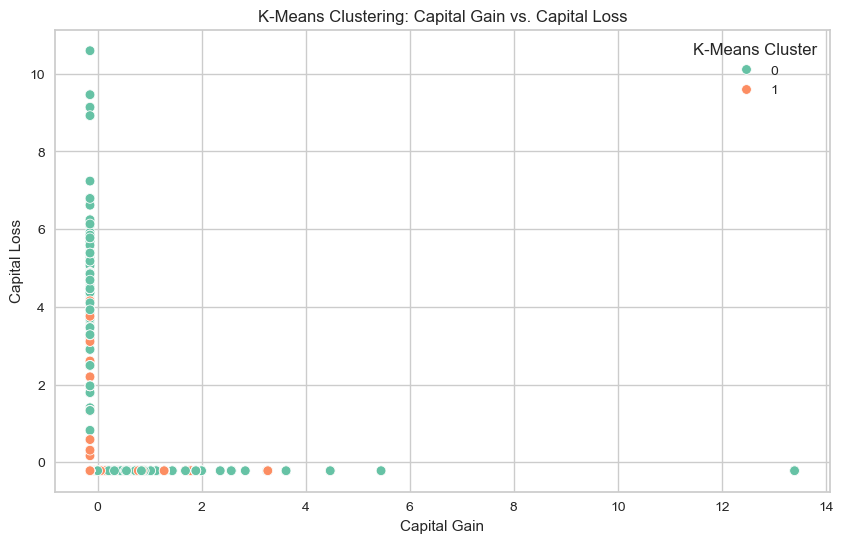

In [227]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df_new = pd.DataFrame(X_transformed, columns=feature_names)

# get relevant columns for clustering
relevant_columns = [
    col for col in feature_names
    if col.startswith('cat__Marital-status_') or  
       col in ['num__Capital-gain', 'num__Capital-loss']
]

X_relevant = pd.DataFrame(X_transformed, columns=feature_names)[relevant_columns]
# X_relevant = X_relevant_cleaned[relevant_columns]
df_cleaned = df.dropna(how="any")

categorical_cols = ["Workclass", "Education", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Native-country", "Income"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip())

for col in categorical_cols:
    df_cleaned = df_cleaned[~df_cleaned[col].isin(['?'])]

X_relevant_cleaned = pd.DataFrame(X_transformed, columns=feature_names).iloc[df_cleaned.index]

# perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=100, max_iter=300)
kmeans_labels = kmeans.fit_predict(X_relevant_cleaned)

X_relevant_cleaned_copy = X_relevant_cleaned.copy()
X_relevant_cleaned_copy['KMeans_Cluster'] = kmeans_labels

# plot capital gain vs. capital loss with K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_relevant_cleaned_copy['num__Capital-gain'],
    y=X_relevant_cleaned_copy['num__Capital-loss'],
    hue=X_relevant_cleaned_copy['KMeans_Cluster'],
    palette="Set2",
    legend="full"
)
plt.title("K-Means Clustering: Capital Gain vs. Capital Loss")
plt.xlabel("Capital Gain")
plt.ylabel("Capital Loss")
plt.legend(title="K-Means Cluster")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_relevant_cleaned)
    score = silhouette_score(X_relevant_cleaned, kmeans_labels)
    silhouette_scores.append(score)

for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}: Silhouette Score = {score:.4f}")

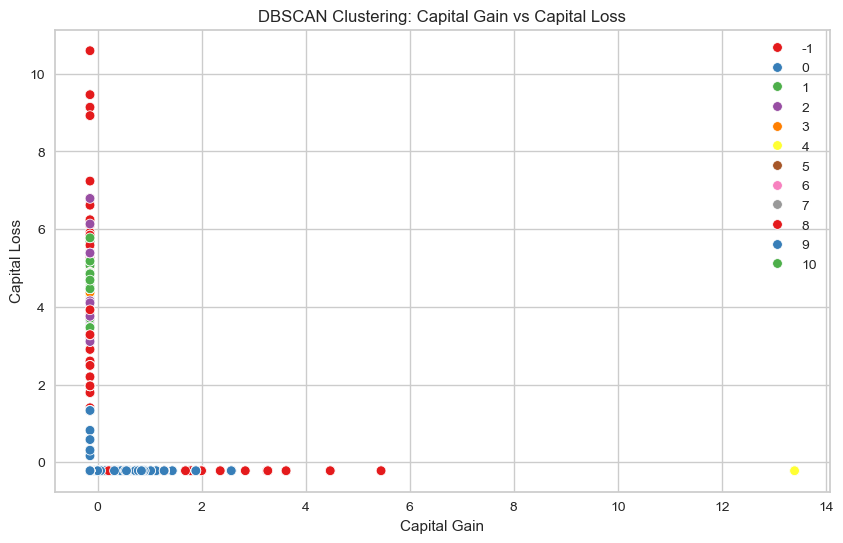

In [228]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_relevant_cleaned)

X_relevant_cleaned_copy['DBSCAN_Cluster'] = dbscan_labels

# visualize DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_relevant_cleaned_copy['num__Capital-gain'],
    y=X_relevant_cleaned_copy['num__Capital-loss'],
    hue=dbscan_labels,
    palette="Set1",
    legend="full"
)
plt.title("DBSCAN Clustering: Capital Gain vs Capital Loss")
plt.xlabel("Capital Gain")
plt.ylabel("Capital Loss")
plt.show()

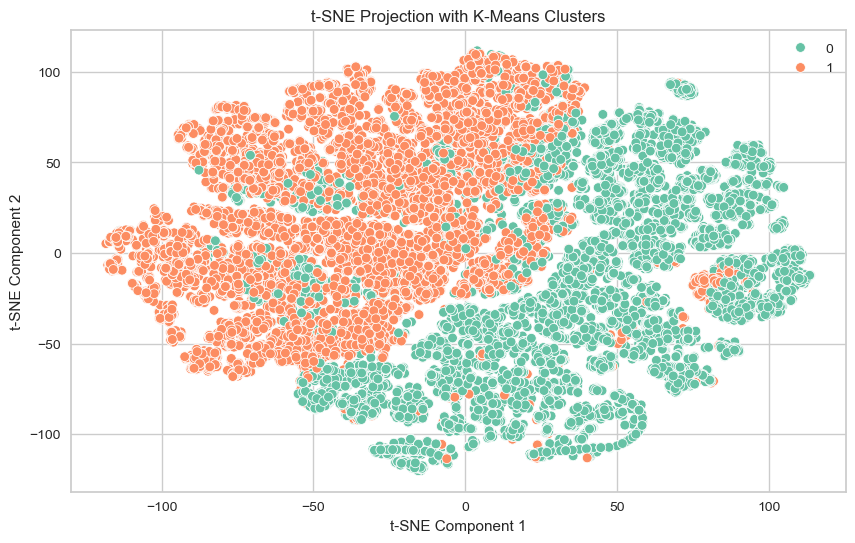

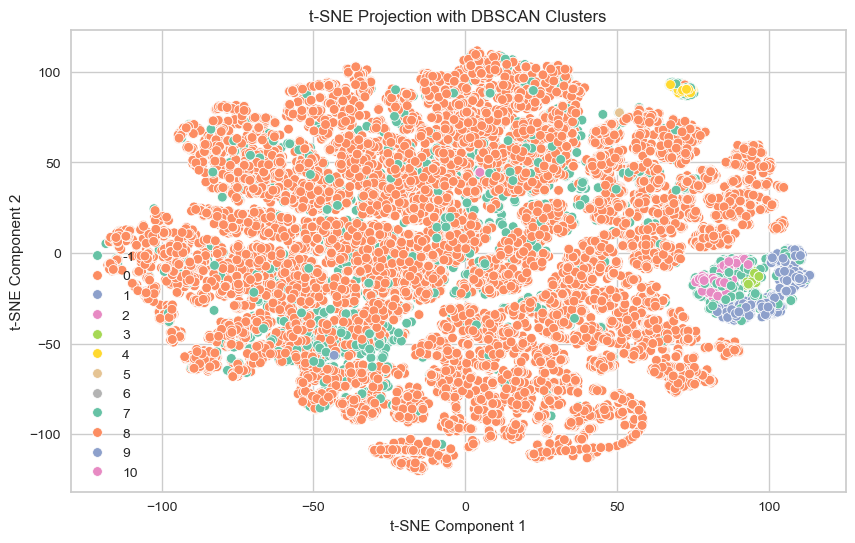

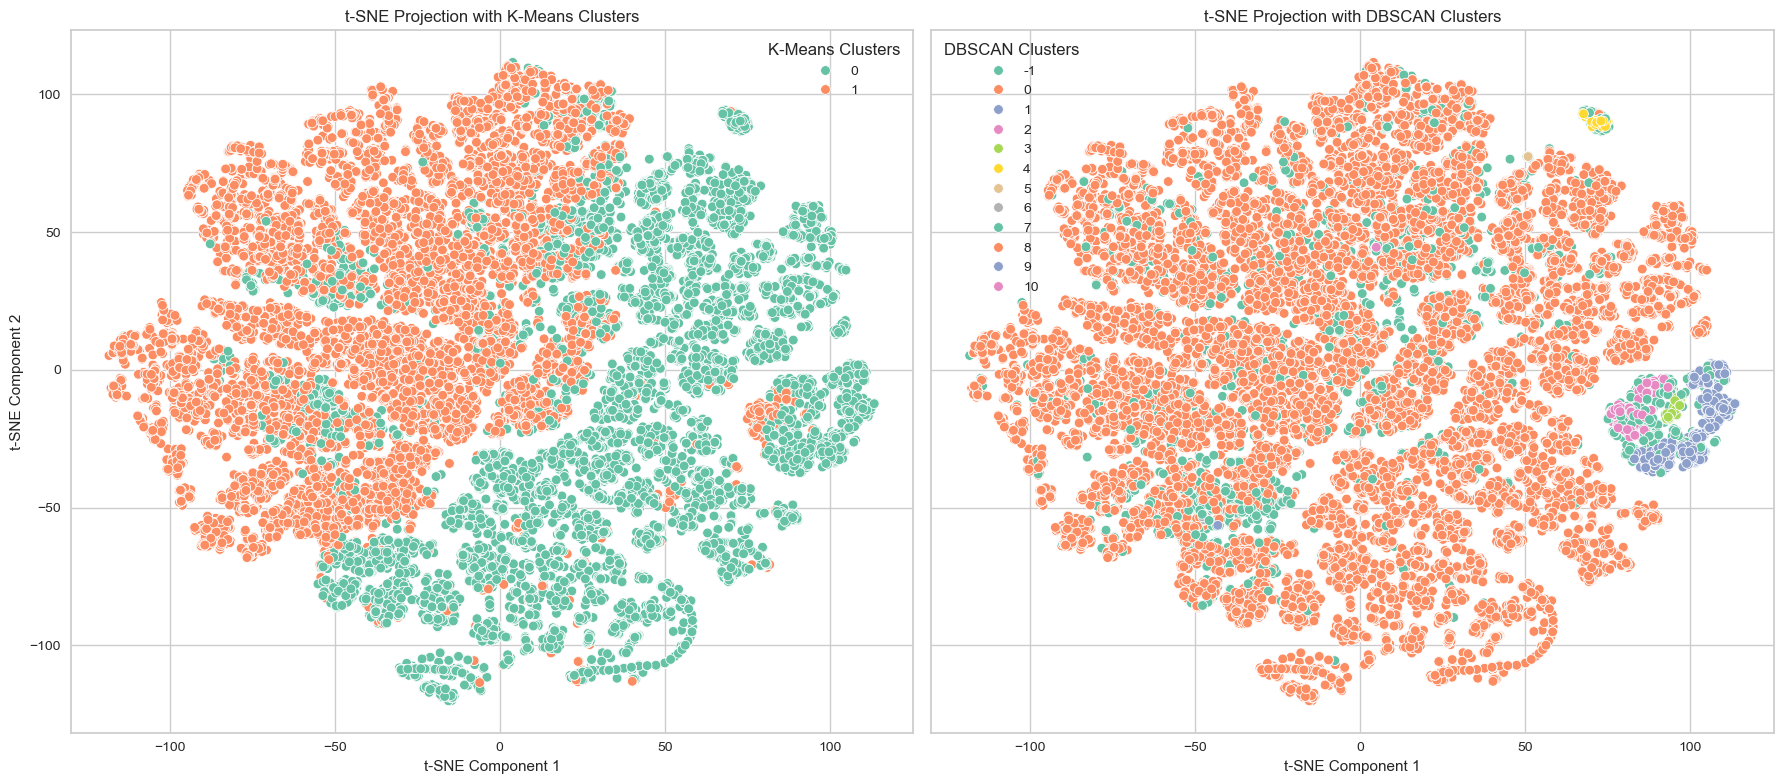

In [229]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_relevant_cleaned)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=kmeans_labels, 
    palette="Set2",
    legend="full"
)
plt.title("t-SNE Projection with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=dbscan_labels, 
    palette="Set2",
    legend="full"
)
plt.title("t-SNE Projection with DBSCAN Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# plotting K-Means and DBSCAN clusters side-by-side using different axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# k-Means plot
sns.scatterplot(
    ax=axes[0],
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=kmeans_labels,
    palette="Set2",
    legend="full"
)
axes[0].set_title("t-SNE Projection with K-Means Clusters")
axes[0].set_xlabel("t-SNE Component 1")
axes[0].set_ylabel("t-SNE Component 2")
axes[0].legend(title="K-Means Clusters", loc="best")

# DBSCAN plot
sns.scatterplot(
    ax=axes[1],
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=dbscan_labels,
    palette="Set2",
    legend="full"
)
axes[1].set_title("t-SNE Projection with DBSCAN Clusters")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2") 
axes[1].legend(title="DBSCAN Clusters", loc="best")

plt.tight_layout()
plt.show()


In [230]:
df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

X_relevant_cleaned_copy['Income_Binary'] = df_cleaned['Income_Binary'].values

kmeans_marital_status = X_relevant_cleaned_copy.groupby('KMeans_Cluster')[
    [col for col in relevant_columns if col.startswith('cat__Marital-status_')]
].mean()

kmeans_marital_status.columns = [col.replace('cat__Marital-status_', '') for col in kmeans_marital_status.columns]

economic_metrics_kmeans = X_relevant_cleaned_copy.groupby('KMeans_Cluster').agg({
    'num__Capital-gain': 'mean',
    'num__Capital-loss': 'mean',
    'Income_Binary': 'mean'  
})
kmeans_combined = kmeans_marital_status.merge(economic_metrics_kmeans, left_index=True, right_index=True)

# analysis for K-Means clusters
print("Combined Analysis for K-Means Clusters:")
display(kmeans_combined)

dbscan_marital_status = X_relevant_cleaned_copy.groupby('DBSCAN_Cluster')[
    [col for col in relevant_columns if col.startswith('cat__Marital-status_')]
].mean()

dbscan_marital_status.columns = [col.replace('cat__Marital-status_', '') for col in dbscan_marital_status.columns]

economic_metrics_dbscan = X_relevant_cleaned_copy.groupby('DBSCAN_Cluster').agg({
    'num__Capital-gain': 'mean',
    'num__Capital-loss': 'mean',
    'Income_Binary': 'mean'  # proportion of individuals earning >50K
})
dbscan_combined = dbscan_marital_status.merge(economic_metrics_dbscan, left_index=True, right_index=True)

# composition of DBSCAN clusters
print("Combined Analysis for DBSCAN Clusters:")
display(dbscan_combined)


Combined Analysis for K-Means Clusters:


Divorced   Married-AF-spouse   Married-civ-spouse  \
KMeans_Cluster                                                       
0                0.062065            0.000478             0.875324   
1                0.213020            0.000902             0.080180   

                 Married-spouse-absent   Never-married   Separated   Widowed  \
KMeans_Cluster                                                                 
0                             0.005531        0.032022    0.010515  0.014065   
1                             0.018627        0.596648    0.050596  0.040026   

                num__Capital-gain  num__Capital-loss  Income_Binary  
KMeans_Cluster                                                       
0                        0.123611           0.162136       0.447221  
1                       -0.112907          -0.147898       0.061747

Combined Analysis for DBSCAN Clusters:


Divorced   Married-AF-spouse   Married-civ-spouse  \
DBSCAN_Cluster                                                       
-1               0.188315            0.000567             0.261486   
 0               0.139921            0.000735             0.466784   
 1               0.000000            0.000000             1.000000   
 2               0.281955            0.000000             0.000000   
 3               0.000000            0.000000             1.000000   
 4               0.000000            0.000000             0.989691   
 5               0.000000            0.000000             1.000000   
 6               0.000000            0.000000             0.000000   
 7               0.000000            0.000000             0.000000   
 8               0.000000            0.000000             1.000000   
 9               0.000000            0.000000             0.000000   
 10              0.142857            0.000000             0.000000   

                 Married-spouse-absent   Never-married   Separated   Widowed  \
DBSCAN_Cluster                                                                 
-1                            0.080545        0.277935    0.089620  0.101531   
 0                            0.008272        0.332157    0.028345  0.023786   
 1                            0.000000        0.000000    0.000000  0.000000   
 2                            0.007519        0.687970    0.018797  0.003759   
 3                            0.000000        0.000000    0.000000  0.000000   
 4                            0.000000        0.000000    0.010309  0.000000   
 5                            0.000000        0.000000    0.000000  0.000000   
 6                            0.000000        1.000000    0.000000  0.000000   
 7                            0.000000        1.000000    0.000000  0.000000   
 8                            0.000000        0.000000    0.000000  0.000000   
 9                            0.000000        1.000000    0.000000  0.000000   
 10                           0.142857        0.142857    0.571429  0.000000   

                num__Capital-gain  num__Capital-loss  Income_Binary  
DBSCAN_Cluster                                                       
-1                       0.411358           0.700723       0.229722  
 0                      -0.068869          -0.215889       0.234513  
 1                      -0.145923           4.531472       0.734057  
 2                      -0.145923           4.225233       0.120301  
 3                      -0.145923           4.464530       0.761905  
 4                      13.394372          -0.216663       1.000000  
 5                      -0.145923          -0.216663       0.000000  
 6                      -0.113185          -0.216663       0.000000  
 7                      -0.145923          -0.216663       0.000000  
 8                      13.394372          -0.216663       1.000000  
 9                      -0.145923          -0.216663       0.000000  
 10                     -0.145923          -0.141150       0.142857

In [231]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_relevant_cleaned)

kmeans_tsne = KMeans(n_clusters=3, random_state=42)
tsne_kmeans_labels = kmeans_tsne.fit_predict(X_tsne)

X_relevant_cleaned_copy['tSNE_Component_1'] = X_tsne[:, 0]
X_relevant_cleaned_copy['tSNE_Component_2'] = X_tsne[:, 1]
X_relevant_cleaned_copy['tSNE_KMeans_Cluster'] = tsne_kmeans_labels

# group t-sne cluster items by marital status and then average
tsne_marital_status = X_relevant_cleaned_copy.groupby('tSNE_KMeans_Cluster')[
    [col for col in relevant_columns if col.startswith('cat__Marital-status_')]
].mean()

# rename column
tsne_marital_status.columns = [col.replace('cat__Marital-status_', '') for col in tsne_marital_status.columns]

# get the average
tsne_economic_metrics = X_relevant_cleaned_copy.groupby('tSNE_KMeans_Cluster').agg({
    'num__Capital-gain': 'mean',
    'num__Capital-loss': 'mean',
    'Income_Binary': 'mean'  
})

# combine the metrics
tsne_combined = tsne_marital_status.merge(tsne_economic_metrics, left_index=True, right_index=True)

print("Composition of t-SNE Clusters:")
display(tsne_combined)


Composition of t-SNE Clusters:


Divorced   Married-AF-spouse   Married-civ-spouse  \
tSNE_KMeans_Cluster                                                       
0                     0.175651            0.000398             0.316789   
1                     0.226830            0.000000             0.143012   
2                     0.014567            0.001708             0.947056   

                      Married-spouse-absent   Never-married   Separated  \
tSNE_KMeans_Cluster                                                       
0                                  0.018997        0.407002    0.052119   
1                                  0.016251        0.526642    0.038314   
2                                  0.001406        0.028833    0.002612   

                      Widowed  num__Capital-gain  num__Capital-loss  \
tSNE_KMeans_Cluster                                                   
0                    0.029043          -0.113053          -0.215073   
1                    0.048951           0.147608          -0.213518   
2                    0.003818          -0.030477           0.443058   

                     Income_Binary  
tSNE_KMeans_Cluster                 
0                         0.079172  
1                         0.196494  
2                         0.473880